# Tree Example: Guess Who 
### PHYS 453 - Class 2/12/2020
Use a few columns from our class roster to generate an optimal decision tree for guess who


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

In [2]:
#roster = pd.read_csv('roster.csv')
roster = pd.read_csv('https://raw.githubusercontent.com/mdaugherity/PatternRecognition2020/master/Class%20Work/roster.csv')

In [3]:
df = roster.copy()

In [4]:
df

,Nickname,Classification,Major,Gender,Glasses
0,Keaton,SR,PHYS,M,N
1,Christine,SR,ENGR,F,Y
2,Brazos,SR,ENGR,M,N
3,Chris,SR,MATH,M,N
4,Brighton,SR,CS,M,N
5,Yves,SR,ENGR,M,N
6,Roy,SR,PHYS,M,Y
7,Asahi,JR,ENGR,M,N
8,Nathan,JR,CS,M,N


In [5]:
# Make new numeric columns for everything   
# (PS - for real problems we would want One-Hot Encoding instead of factorize)
labels, names = pd.factorize(df.Nickname)
df['name']=labels

labels, years = pd.factorize(df.Classification)
df['year']=labels

labels, majors = pd.factorize(df.Major)
df['major']=labels

labels, genders = pd.factorize(df.Gender)
df['gender']=labels

labels, glasses = pd.factorize(df.Glasses)
df['glasses']=labels

In [6]:
df

,Nickname,Classification,Major,Gender,Glasses,name,year,major,gender,glasses
0,Keaton,SR,PHYS,M,N,0,0,0,0,0
1,Christine,SR,ENGR,F,Y,1,0,1,1,1
2,Brazos,SR,ENGR,M,N,2,0,1,0,0
3,Chris,SR,MATH,M,N,3,0,2,0,0
4,Brighton,SR,CS,M,N,4,0,3,0,0
5,Yves,SR,ENGR,M,N,5,0,1,0,0
6,Roy,SR,PHYS,M,Y,6,0,0,0,1
7,Asahi,JR,ENGR,M,N,7,1,1,0,0
8,Nathan,JR,CS,M,N,8,1,3,0,0


In [7]:
df.columns

Index(['Nickname', 'Classification', 'Major', 'Gender', 'Glasses', 'name',
       'year', 'major', 'gender', 'glasses'],
      dtype='object')

In [8]:
features = ['year', 'major', 'gender', 'glasses']
cat = ['name']

X = df[features].copy()
y = df[cat].copy()

In [9]:
# We don't need this, but to summarize what we've done
df[features+cat]  # all of the letters are now numbers!

,year,major,gender,glasses,name
0,0,0,0,0,0
1,0,1,1,1,1
2,0,1,0,0,2
3,0,2,0,0,3
4,0,3,0,0,4
5,0,1,0,0,5
6,0,0,0,1,6
7,1,1,0,0,7
8,1,3,0,0,8


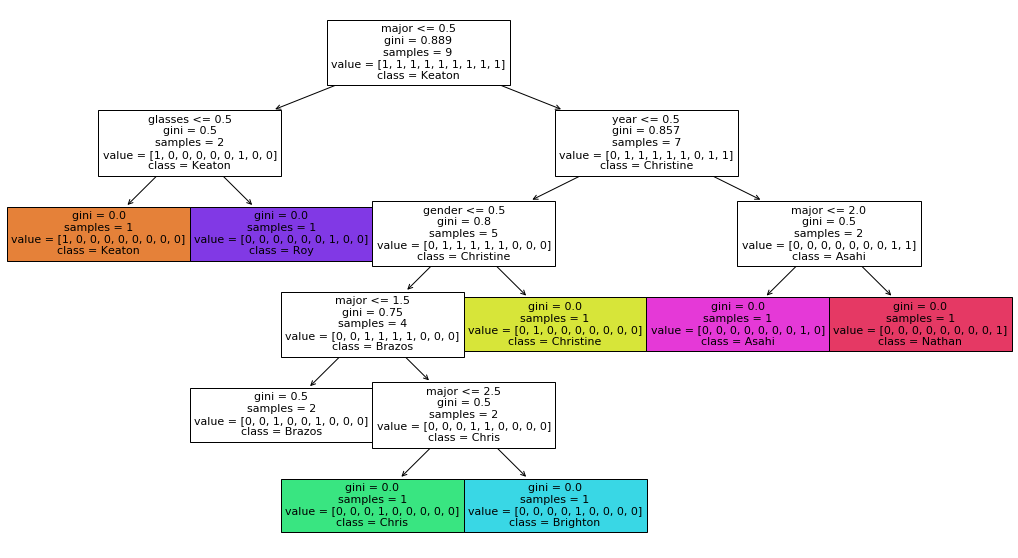

In [10]:
plt.figure(figsize=(18,10))
clf = tree.DecisionTreeClassifier(random_state=0)  # random_state = [some number] keeps you from getting different results every time
clf.fit(X,y)
tree.plot_tree(clf, filled=True, feature_names=features, class_names=df.Nickname)
plt.show()

In [11]:
# cheat sheet to see ordering: 
print(majors)
print(years)
print(genders)
print(glasses)

Index(['PHYS', 'ENGR', 'MATH', 'CS'], dtype='object')
Index(['SR', 'JR'], dtype='object')
Index(['M', 'F'], dtype='object')
Index(['N', 'Y'], dtype='object')
